In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import skew

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
columns_to_keep = ['LotArea', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotalBsmtSF', 'FullBath', 'SalePrice']

In [5]:
train = train[columns_to_keep]
test = test[['LotArea', 'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotalBsmtSF', 'FullBath']]

In [6]:
train['SalePrice'] = np.log1p(train['SalePrice'])
new_skewness = skew(train['SalePrice'])
print("Skewness after logarithmic transformation:", new_skewness)

Skewness after logarithmic transformation: 0.12122191311528363


In [7]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
imputer = SimpleImputer(strategy='mean')
X_test_scaled = imputer.fit_transform(X_test_scaled)

In [11]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [12]:
predictions = ridge.predict(X_test_scaled)

In [13]:
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.04909854342887823


In [14]:
predicted_sale_price = np.expm1(predictions)

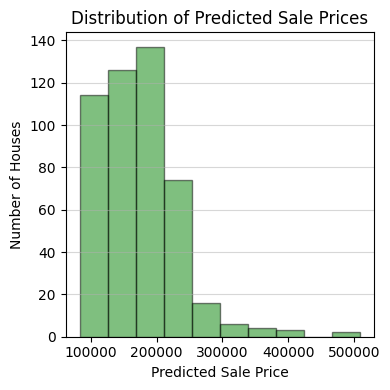

In [23]:
plt.figure(figsize=(4,4))
plt.hist(predicted_sale_price, bins=10, color='green', alpha=0.5, edgecolor='black')
plt.title('Distribution of Predicted Sale Prices')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Number of Houses')
plt.grid(axis='y', alpha=0.50)
plt.tight_layout()
plt.show()

In [16]:
test_scaled = scaler.transform(test)
test_scaled = imputer.transform(test_scaled)

In [17]:
test_predictions = ridge.predict(test_scaled)
predicted_test_prices = np.expm1(test_predictions)

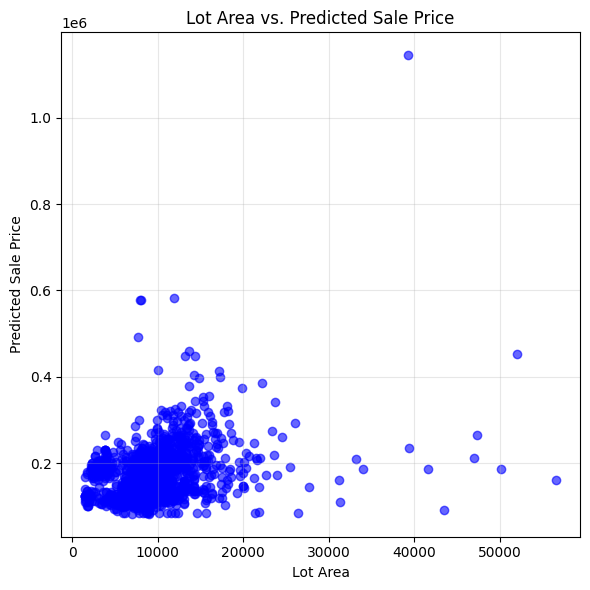

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(test['LotArea'], predicted_test_prices, alpha=0.6, color='blue')
plt.title('Lot Area vs. Predicted Sale Price')
plt.xlabel('Lot Area')
plt.ylabel('Predicted Sale Price')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [19]:
train['TotalBathrooms'] = (train['FullBath'] + 0.5 * train['HalfBath'] +train['BsmtFullBath'] +0.5 * train['BsmtHalfBath'])

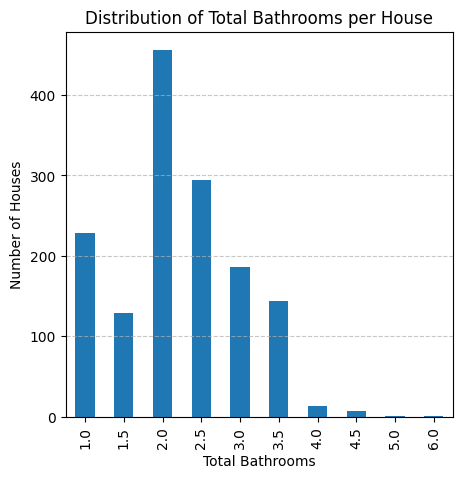

In [20]:
train['TotalBathrooms'].value_counts().sort_index().plot(kind='bar',figsize=(5, 5))
plt.title('Distribution of Total Bathrooms per House')
plt.xlabel('Total Bathrooms')
plt.ylabel('Number of Houses')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

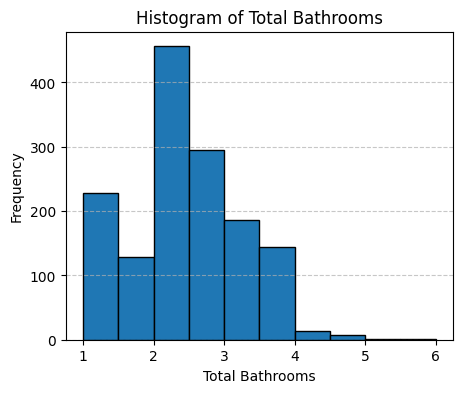

In [21]:
plt.figure(figsize=(5,4))
plt.hist(train['TotalBathrooms'], bins=10, edgecolor='black')
plt.title('Histogram of Total Bathrooms')
plt.xlabel('Total Bathrooms')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()